# Neural Network - Classification
Using the top 10 features

### Importing Libraries and Data

In [15]:
import _pickle as pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Dropout

In [2]:
with open("top10_df.pkl", "rb") as fp:
    df = pickle.load(fp)

## Preparing the Data

### Scaling

In [5]:
scaler = StandardScaler()

features_df = df.drop(["Decision"], 1)

scaled_df = pd.DataFrame(scaler.fit_transform(features_df), 
                               index=features_df.index, 
                               columns=features_df.columns)

df = scaled_df.join(df.Decision)

### Train, test, split

In [29]:
X = df.drop(["Decision"], 1)
y = df.Decision

# Train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Functions

In [6]:
def visualize_training_results(results):
    """
    Plots the loss and accuracy for the training and testing data
    """
    history = results.history
    plt.figure(figsize=(12,4))
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure(figsize=(12,4))
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

## Modeling - NN Classification

In [109]:
# Instatiating the model
model = Sequential()

activ = "relu"
# Input Layer
model.add(Dense(100, activation=activ,input_shape=(X.shape[1],)))

# Hidden Layers (11)
model.add(Dense(100, activation=activ))
model.add(Dense(90, activation=activ))
model.add(Dropout(.5))
model.add(Dense(80, activation=activ))
model.add(Dense(70, activation=activ))
model.add(Dense(60, activation=activ))
model.add(Dense(50, activation=activ))
model.add(Dropout(.5))
model.add(Dense(50, activation=activ))
model.add(Dense(50, activation=activ))
model.add(Dense(50, activation=activ))
model.add(Dense(50, activation=activ))
model.add(Dropout(.3))
model.add(Dense(50, activation=activ))
model.add(Dense(50, activation=activ))
model.add(Dense(50, activation=activ))
model.add(Dense(50, activation=activ))

# Output Layer
model.add(Dense(1))

model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_175 (Dense)            (None, 100)               1100      
_________________________________________________________________
dense_176 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_177 (Dense)            (None, 90)                9090      
_________________________________________________________________
dropout_24 (Dropout)         (None, 90)                0         
_________________________________________________________________
dense_178 (Dense)            (None, 80)                7280      
_________________________________________________________________
dense_179 (Dense)            (None, 70)                5670      
_________________________________________________________________
dense_180 (Dense)            (None, 60)              

In [110]:
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [112]:
res = model.fit(X_train, y_train, epochs=2500, batch_size=128, validation_data=(X_test, y_test))

Train on 32958 samples, validate on 10986 samples
Epoch 1/2500
32958/32958 [==============================] - 2s 48us/step - loss: 0.6121 - accuracy: 0.3735 - val_loss: 0.6227 - val_accuracy: 0.3584
Epoch 2/2500
32958/32958 [==============================] - 1s 45us/step - loss: 0.6124 - accuracy: 0.3724 - val_loss: 0.6197 - val_accuracy: 0.3668
Epoch 3/2500
32958/32958 [==============================] - 2s 46us/step - loss: 0.6114 - accuracy: 0.3736 - val_loss: 0.6265 - val_accuracy: 0.3514
Epoch 4/2500
32958/32958 [==============================] - 2s 46us/step - loss: 0.6112 - accuracy: 0.3732 - val_loss: 0.6182 - val_accuracy: 0.3612
Epoch 5/2500
32958/32958 [==============================] - 1s 45us/step - loss: 0.6094 - accuracy: 0.3770 - val_loss: 0.6232 - val_accuracy: 0.3585
Epoch 6/2500
32958/32958 [==============================] - 1s 45us/step - loss: 0.6092 - accuracy: 0.3733 - val_loss: 0.6230 - val_accuracy: 0.3530
Epoch 7/2500
32958/32958 [==============================

32958/32958 [==============================] - 1s 44us/step - loss: 0.5859 - accuracy: 0.3852 - val_loss: 0.6273 - val_accuracy: 0.3626
Epoch 56/2500
32958/32958 [==============================] - 1s 45us/step - loss: 0.5851 - accuracy: 0.3836 - val_loss: 0.6230 - val_accuracy: 0.3653
Epoch 57/2500
32958/32958 [==============================] - 1s 45us/step - loss: 0.5866 - accuracy: 0.3850 - val_loss: 0.6266 - val_accuracy: 0.3610
Epoch 58/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.5843 - accuracy: 0.3874 - val_loss: 0.6290 - val_accuracy: 0.3653
Epoch 59/2500
32958/32958 [==============================] - 2s 48us/step - loss: 0.5842 - accuracy: 0.3867 - val_loss: 0.6250 - val_accuracy: 0.3631
Epoch 60/2500
32958/32958 [==============================] - 2s 54us/step - loss: 0.5857 - accuracy: 0.3883 - val_loss: 0.6242 - val_accuracy: 0.3631
Epoch 61/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.5819 - accuracy: 0.3886 - val_

32958/32958 [==============================] - 1s 45us/step - loss: 0.5517 - accuracy: 0.4141 - val_loss: 0.6466 - val_accuracy: 0.3682
Epoch 110/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.5491 - accuracy: 0.4175 - val_loss: 0.6501 - val_accuracy: 0.3694
Epoch 111/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.5493 - accuracy: 0.4166 - val_loss: 0.6432 - val_accuracy: 0.3688
Epoch 112/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.5487 - accuracy: 0.4188 - val_loss: 0.6513 - val_accuracy: 0.3631
Epoch 113/2500
32958/32958 [==============================] - 1s 45us/step - loss: 0.5472 - accuracy: 0.4217 - val_loss: 0.6438 - val_accuracy: 0.3666
Epoch 114/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.5491 - accuracy: 0.4150 - val_loss: 0.6458 - val_accuracy: 0.3672
Epoch 115/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.5495 - accuracy: 0.4155 

32958/32958 [==============================] - 1s 44us/step - loss: 0.5240 - accuracy: 0.4380 - val_loss: 0.6545 - val_accuracy: 0.3687
Epoch 164/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.5210 - accuracy: 0.4417 - val_loss: 0.6486 - val_accuracy: 0.3695
Epoch 165/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.5217 - accuracy: 0.4401 - val_loss: 0.6594 - val_accuracy: 0.3709
Epoch 166/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.5205 - accuracy: 0.4439 - val_loss: 0.6585 - val_accuracy: 0.3762
Epoch 167/2500
32958/32958 [==============================] - 1s 43us/step - loss: 0.5200 - accuracy: 0.4447 - val_loss: 0.6535 - val_accuracy: 0.3699
Epoch 168/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.5204 - accuracy: 0.4437 - val_loss: 0.6531 - val_accuracy: 0.3704
Epoch 169/2500
32958/32958 [==============================] - 1s 43us/step - loss: 0.5178 - accuracy: 0.4458 

32958/32958 [==============================] - 1s 45us/step - loss: 0.5020 - accuracy: 0.4626 - val_loss: 0.6609 - val_accuracy: 0.3717
Epoch 218/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.5000 - accuracy: 0.4669 - val_loss: 0.6637 - val_accuracy: 0.3731
Epoch 219/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.5018 - accuracy: 0.4605 - val_loss: 0.6736 - val_accuracy: 0.3738
Epoch 220/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.5035 - accuracy: 0.4610 - val_loss: 0.6612 - val_accuracy: 0.3733
Epoch 221/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.5024 - accuracy: 0.4607 - val_loss: 0.6627 - val_accuracy: 0.3708
Epoch 222/2500
32958/32958 [==============================] - 1s 45us/step - loss: 0.5000 - accuracy: 0.4631 - val_loss: 0.6684 - val_accuracy: 0.3778
Epoch 223/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.5033 - accuracy: 0.4604 

32958/32958 [==============================] - 1s 44us/step - loss: 0.4857 - accuracy: 0.4760 - val_loss: 0.6665 - val_accuracy: 0.3749
Epoch 272/2500
32958/32958 [==============================] - 1s 45us/step - loss: 0.4834 - accuracy: 0.4762 - val_loss: 0.6736 - val_accuracy: 0.3756
Epoch 273/2500
32958/32958 [==============================] - 1s 43us/step - loss: 0.4819 - accuracy: 0.4804 - val_loss: 0.6664 - val_accuracy: 0.3736
Epoch 274/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.4852 - accuracy: 0.4795 - val_loss: 0.6865 - val_accuracy: 0.3713
Epoch 275/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.4843 - accuracy: 0.4794 - val_loss: 0.6679 - val_accuracy: 0.3706
Epoch 276/2500
32958/32958 [==============================] - 2s 46us/step - loss: 0.4852 - accuracy: 0.4766 - val_loss: 0.6718 - val_accuracy: 0.3749
Epoch 277/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.4843 - accuracy: 0.4782 

32958/32958 [==============================] - 1s 44us/step - loss: 0.4705 - accuracy: 0.4920 - val_loss: 0.6726 - val_accuracy: 0.3759
Epoch 326/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.4712 - accuracy: 0.4936 - val_loss: 0.6822 - val_accuracy: 0.3778
Epoch 327/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.4775 - accuracy: 0.4867 - val_loss: 0.6814 - val_accuracy: 0.3773
Epoch 328/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.4741 - accuracy: 0.4880 - val_loss: 0.6724 - val_accuracy: 0.3736
Epoch 329/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.4738 - accuracy: 0.4858 - val_loss: 0.6804 - val_accuracy: 0.3758
Epoch 330/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.4729 - accuracy: 0.4896 - val_loss: 0.6765 - val_accuracy: 0.3775
Epoch 331/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.4731 - accuracy: 0.4930 

32958/32958 [==============================] - 2s 46us/step - loss: 0.4644 - accuracy: 0.4988 - val_loss: 0.6784 - val_accuracy: 0.3777
Epoch 380/2500
32958/32958 [==============================] - 1s 45us/step - loss: 0.4636 - accuracy: 0.4990 - val_loss: 0.6907 - val_accuracy: 0.3794
Epoch 381/2500
32958/32958 [==============================] - 2s 46us/step - loss: 0.4622 - accuracy: 0.5019 - val_loss: 0.6832 - val_accuracy: 0.3830
Epoch 382/2500
32958/32958 [==============================] - 1s 45us/step - loss: 0.4652 - accuracy: 0.4960 - val_loss: 0.6817 - val_accuracy: 0.3814
Epoch 383/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.4637 - accuracy: 0.5006 - val_loss: 0.6828 - val_accuracy: 0.3807
Epoch 384/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.4610 - accuracy: 0.5034 - val_loss: 0.6787 - val_accuracy: 0.3804
Epoch 385/2500
32958/32958 [==============================] - 1s 43us/step - loss: 0.4603 - accuracy: 0.5013 

32958/32958 [==============================] - 1s 45us/step - loss: 0.4545 - accuracy: 0.5066 - val_loss: 0.7036 - val_accuracy: 0.3783
Epoch 434/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.4575 - accuracy: 0.5059 - val_loss: 0.6811 - val_accuracy: 0.3803
Epoch 435/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.4522 - accuracy: 0.5090 - val_loss: 0.6922 - val_accuracy: 0.3767
Epoch 436/2500
32958/32958 [==============================] - 1s 43us/step - loss: 0.4521 - accuracy: 0.5127 - val_loss: 0.6896 - val_accuracy: 0.3779
Epoch 437/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.4576 - accuracy: 0.5056 - val_loss: 0.6840 - val_accuracy: 0.3798
Epoch 438/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.4543 - accuracy: 0.5080 - val_loss: 0.6776 - val_accuracy: 0.3762
Epoch 439/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.4535 - accuracy: 0.5104 

32958/32958 [==============================] - 1s 44us/step - loss: 0.4499 - accuracy: 0.5130 - val_loss: 0.6925 - val_accuracy: 0.3762
Epoch 488/2500
32958/32958 [==============================] - 1s 45us/step - loss: 0.4477 - accuracy: 0.5161 - val_loss: 0.7132 - val_accuracy: 0.3779
Epoch 489/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.4420 - accuracy: 0.5218 - val_loss: 0.7045 - val_accuracy: 0.3859
Epoch 490/2500
32958/32958 [==============================] - 1s 43us/step - loss: 0.4465 - accuracy: 0.5204 - val_loss: 0.6907 - val_accuracy: 0.3838
Epoch 491/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.4464 - accuracy: 0.5191 - val_loss: 0.6952 - val_accuracy: 0.3805
Epoch 492/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.4435 - accuracy: 0.5211 - val_loss: 0.6938 - val_accuracy: 0.3816
Epoch 493/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.4463 - accuracy: 0.5191 

32958/32958 [==============================] - 1s 43us/step - loss: 0.4378 - accuracy: 0.5217 - val_loss: 0.6950 - val_accuracy: 0.3791
Epoch 542/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.4357 - accuracy: 0.5265 - val_loss: 0.7103 - val_accuracy: 0.3801
Epoch 543/2500
32958/32958 [==============================] - 1s 45us/step - loss: 0.4419 - accuracy: 0.5181 - val_loss: 0.6868 - val_accuracy: 0.3824
Epoch 544/2500
32958/32958 [==============================] - 1s 45us/step - loss: 0.4379 - accuracy: 0.5250 - val_loss: 0.6943 - val_accuracy: 0.3811
Epoch 545/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.4433 - accuracy: 0.5204 - val_loss: 0.6913 - val_accuracy: 0.3818
Epoch 546/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.4370 - accuracy: 0.5240 - val_loss: 0.6948 - val_accuracy: 0.3793
Epoch 547/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.4379 - accuracy: 0.5248 

32958/32958 [==============================] - 1s 44us/step - loss: 0.4343 - accuracy: 0.5293 - val_loss: 0.6961 - val_accuracy: 0.3816
Epoch 596/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.4339 - accuracy: 0.5309 - val_loss: 0.7140 - val_accuracy: 0.3872
Epoch 597/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.4361 - accuracy: 0.5285 - val_loss: 0.6928 - val_accuracy: 0.3779
Epoch 598/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.4349 - accuracy: 0.5250 - val_loss: 0.7035 - val_accuracy: 0.3829
Epoch 599/2500
32958/32958 [==============================] - 1s 43us/step - loss: 0.4326 - accuracy: 0.5310 - val_loss: 0.6895 - val_accuracy: 0.3851
Epoch 600/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.4355 - accuracy: 0.5315 - val_loss: 0.6907 - val_accuracy: 0.3784
Epoch 601/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.4326 - accuracy: 0.5312 

32958/32958 [==============================] - 2s 49us/step - loss: 0.4276 - accuracy: 0.5356 - val_loss: 0.6943 - val_accuracy: 0.3866
Epoch 650/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.4242 - accuracy: 0.5370 - val_loss: 0.7059 - val_accuracy: 0.3791 0s - loss: 0.4
Epoch 651/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.4268 - accuracy: 0.5340 - val_loss: 0.7155 - val_accuracy: 0.3866
Epoch 652/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.4231 - accuracy: 0.5371 - val_loss: 0.7010 - val_accuracy: 0.3820
Epoch 653/2500
32958/32958 [==============================] - 2s 50us/step - loss: 0.4283 - accuracy: 0.5336 - val_loss: 0.6962 - val_accuracy: 0.3844
Epoch 654/2500
32958/32958 [==============================] - 2s 50us/step - loss: 0.4304 - accuracy: 0.5347 - val_loss: 0.6987 - val_accuracy: 0.3869
Epoch 655/2500
32958/32958 [==============================] - 2s 50us/step - loss: 0.4387 - ac

32958/32958 [==============================] - 2s 49us/step - loss: 0.4239 - accuracy: 0.5378 - val_loss: 0.7103 - val_accuracy: 0.3857
Epoch 704/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.4247 - accuracy: 0.5402 - val_loss: 0.7094 - val_accuracy: 0.3788
Epoch 705/2500
32958/32958 [==============================] - 2s 48us/step - loss: 0.4254 - accuracy: 0.5375 - val_loss: 0.7046 - val_accuracy: 0.3854
Epoch 706/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.4245 - accuracy: 0.5343 - val_loss: 0.7011 - val_accuracy: 0.3815
Epoch 707/2500
32958/32958 [==============================] - 2s 50us/step - loss: 0.4233 - accuracy: 0.5336 - val_loss: 0.7016 - val_accuracy: 0.3824
Epoch 708/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.4193 - accuracy: 0.5405 - val_loss: 0.6988 - val_accuracy: 0.3829
Epoch 709/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.4231 - accuracy: 0.5388 

32958/32958 [==============================] - 2s 49us/step - loss: 0.4189 - accuracy: 0.5423 - val_loss: 0.7076 - val_accuracy: 0.3859
Epoch 758/2500
32958/32958 [==============================] - 2s 48us/step - loss: 0.4161 - accuracy: 0.5467 - val_loss: 0.7018 - val_accuracy: 0.3849
Epoch 759/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.4193 - accuracy: 0.5402 - val_loss: 0.6942 - val_accuracy: 0.3826
Epoch 760/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.4173 - accuracy: 0.5435 - val_loss: 0.6991 - val_accuracy: 0.3824
Epoch 761/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.4172 - accuracy: 0.5424 - val_loss: 0.7162 - val_accuracy: 0.3848
Epoch 762/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.4162 - accuracy: 0.5410 - val_loss: 0.6967 - val_accuracy: 0.3819
Epoch 763/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.4149 - accuracy: 0.5447 

32958/32958 [==============================] - 2s 51us/step - loss: 0.4208 - accuracy: 0.5374 - val_loss: 0.7083 - val_accuracy: 0.3847
Epoch 812/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.4165 - accuracy: 0.5457 - val_loss: 0.7153 - val_accuracy: 0.3815
Epoch 813/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.4198 - accuracy: 0.5440 - val_loss: 0.6994 - val_accuracy: 0.3806
Epoch 814/2500
32958/32958 [==============================] - 2s 50us/step - loss: 0.4193 - accuracy: 0.5396 - val_loss: 0.7103 - val_accuracy: 0.3810
Epoch 815/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.4159 - accuracy: 0.5460 - val_loss: 0.7098 - val_accuracy: 0.3850
Epoch 816/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.4130 - accuracy: 0.5495 - val_loss: 0.7106 - val_accuracy: 0.3850
Epoch 817/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.4136 - accuracy: 0.5472 

32958/32958 [==============================] - 2s 49us/step - loss: 0.4092 - accuracy: 0.5511 - val_loss: 0.7182 - val_accuracy: 0.3875
Epoch 866/2500
32958/32958 [==============================] - 2s 50us/step - loss: 0.4059 - accuracy: 0.5570 - val_loss: 0.7097 - val_accuracy: 0.3864
Epoch 867/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.4145 - accuracy: 0.5472 - val_loss: 0.7192 - val_accuracy: 0.3868
Epoch 868/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.4105 - accuracy: 0.5518 - val_loss: 0.7145 - val_accuracy: 0.3866
Epoch 869/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.4071 - accuracy: 0.5533 - val_loss: 0.7202 - val_accuracy: 0.3862
Epoch 870/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.4078 - accuracy: 0.5516 - val_loss: 0.7227 - val_accuracy: 0.3845
Epoch 871/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.4076 - accuracy: 0.5572 

32958/32958 [==============================] - 2s 49us/step - loss: 0.4042 - accuracy: 0.5598 - val_loss: 0.7171 - val_accuracy: 0.3828
Epoch 920/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.4051 - accuracy: 0.5596 - val_loss: 0.7264 - val_accuracy: 0.3915
Epoch 921/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.4036 - accuracy: 0.5587 - val_loss: 0.7217 - val_accuracy: 0.3873
Epoch 922/2500
32958/32958 [==============================] - 2s 51us/step - loss: 0.4049 - accuracy: 0.5586 - val_loss: 0.7144 - val_accuracy: 0.3895
Epoch 923/2500
32958/32958 [==============================] - 2s 50us/step - loss: 0.4082 - accuracy: 0.5579 - val_loss: 0.7053 - val_accuracy: 0.3831
Epoch 924/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.4058 - accuracy: 0.5549 - val_loss: 0.7207 - val_accuracy: 0.3847
Epoch 925/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.4075 - accuracy: 0.5550 

32958/32958 [==============================] - 2s 49us/step - loss: 0.4034 - accuracy: 0.5566 - val_loss: 0.7232 - val_accuracy: 0.3860
Epoch 974/2500
32958/32958 [==============================] - 2s 50us/step - loss: 0.4074 - accuracy: 0.5551 - val_loss: 0.7209 - val_accuracy: 0.3851
Epoch 975/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.4020 - accuracy: 0.5610 - val_loss: 0.7173 - val_accuracy: 0.3855
Epoch 976/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.4030 - accuracy: 0.5622 - val_loss: 0.7115 - val_accuracy: 0.3879
Epoch 977/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.4062 - accuracy: 0.5562 - val_loss: 0.7067 - val_accuracy: 0.3876
Epoch 978/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.4081 - accuracy: 0.5524 - val_loss: 0.7122 - val_accuracy: 0.3810
Epoch 979/2500
32958/32958 [==============================] - 2s 50us/step - loss: 0.4019 - accuracy: 0.5620 

32958/32958 [==============================] - 2s 50us/step - loss: 0.4019 - accuracy: 0.5635 - val_loss: 0.7203 - val_accuracy: 0.3874
Epoch 1028/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.4012 - accuracy: 0.5621 - val_loss: 0.7078 - val_accuracy: 0.3823
Epoch 1029/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.3984 - accuracy: 0.5646 - val_loss: 0.7229 - val_accuracy: 0.3859
Epoch 1030/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.4023 - accuracy: 0.5586 - val_loss: 0.7233 - val_accuracy: 0.3861
Epoch 1031/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.4014 - accuracy: 0.5626 - val_loss: 0.7182 - val_accuracy: 0.3848
Epoch 1032/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.3970 - accuracy: 0.5646 - val_loss: 0.7228 - val_accuracy: 0.3905
Epoch 1033/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.4026 - accuracy: 0

32958/32958 [==============================] - 2s 50us/step - loss: 0.3962 - accuracy: 0.5649 - val_loss: 0.7247 - val_accuracy: 0.3879
Epoch 1082/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.3965 - accuracy: 0.5611 - val_loss: 0.7376 - val_accuracy: 0.3875
Epoch 1083/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.4001 - accuracy: 0.5627 - val_loss: 0.7336 - val_accuracy: 0.3868
Epoch 1084/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.4025 - accuracy: 0.5617 - val_loss: 0.7223 - val_accuracy: 0.3840
Epoch 1085/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.3968 - accuracy: 0.5672 - val_loss: 0.7268 - val_accuracy: 0.3857
Epoch 1086/2500
32958/32958 [==============================] - 2s 50us/step - loss: 0.3960 - accuracy: 0.5603 - val_loss: 0.7318 - val_accuracy: 0.3878
Epoch 1087/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.3946 - accuracy: 0

32958/32958 [==============================] - 2s 50us/step - loss: 0.3932 - accuracy: 0.5695 - val_loss: 0.7285 - val_accuracy: 0.3863
Epoch 1136/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.3911 - accuracy: 0.5718 - val_loss: 0.7223 - val_accuracy: 0.3838
Epoch 1137/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.3978 - accuracy: 0.5672 - val_loss: 0.7178 - val_accuracy: 0.3837
Epoch 1138/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.4025 - accuracy: 0.5595 - val_loss: 0.7297 - val_accuracy: 0.3851
Epoch 1139/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.3965 - accuracy: 0.5654 - val_loss: 0.7215 - val_accuracy: 0.3849
Epoch 1140/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.3995 - accuracy: 0.5645 - val_loss: 0.7214 - val_accuracy: 0.3854
Epoch 1141/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.3966 - accuracy: 0

32958/32958 [==============================] - 2s 50us/step - loss: 0.3998 - accuracy: 0.5651 - val_loss: 0.7180 - val_accuracy: 0.3879
Epoch 1190/2500
32958/32958 [==============================] - 2s 50us/step - loss: 0.3957 - accuracy: 0.5679 - val_loss: 0.7295 - val_accuracy: 0.3850
Epoch 1191/2500
32958/32958 [==============================] - 2s 50us/step - loss: 0.4020 - accuracy: 0.5637 - val_loss: 0.7343 - val_accuracy: 0.3852
Epoch 1192/2500
32958/32958 [==============================] - 2s 50us/step - loss: 0.3939 - accuracy: 0.5665 - val_loss: 0.7379 - val_accuracy: 0.3836
Epoch 1193/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.3918 - accuracy: 0.5720 - val_loss: 0.7338 - val_accuracy: 0.3905
Epoch 1194/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.3982 - accuracy: 0.5627 - val_loss: 0.7253 - val_accuracy: 0.3859
Epoch 1195/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.3913 - accuracy: 0

32958/32958 [==============================] - 2s 51us/step - loss: 0.3881 - accuracy: 0.5718 - val_loss: 0.7348 - val_accuracy: 0.3899
Epoch 1244/2500
32958/32958 [==============================] - 2s 50us/step - loss: 0.3974 - accuracy: 0.5682 - val_loss: 0.7300 - val_accuracy: 0.3849
Epoch 1245/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.3905 - accuracy: 0.5726 - val_loss: 0.7326 - val_accuracy: 0.3936
Epoch 1246/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.3872 - accuracy: 0.5761 - val_loss: 0.7410 - val_accuracy: 0.3898
Epoch 1247/2500
32958/32958 [==============================] - 2s 50us/step - loss: 0.3890 - accuracy: 0.5734 - val_loss: 0.7307 - val_accuracy: 0.3876
Epoch 1248/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.3925 - accuracy: 0.5724 - val_loss: 0.7290 - val_accuracy: 0.3877
Epoch 1249/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.3915 - accuracy: 0

32958/32958 [==============================] - 2s 51us/step - loss: 0.3941 - accuracy: 0.5699 - val_loss: 0.7532 - val_accuracy: 0.3909
Epoch 1298/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.3952 - accuracy: 0.5691 - val_loss: 0.7341 - val_accuracy: 0.3865
Epoch 1299/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.4051 - accuracy: 0.5603 - val_loss: 0.7141 - val_accuracy: 0.3860
Epoch 1300/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.3987 - accuracy: 0.5656 - val_loss: 0.7149 - val_accuracy: 0.3879
Epoch 1301/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.3914 - accuracy: 0.5684 - val_loss: 0.7429 - val_accuracy: 0.3884
Epoch 1302/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.3969 - accuracy: 0.5694 - val_loss: 0.7287 - val_accuracy: 0.3842
Epoch 1303/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.3902 - accuracy: 0

32958/32958 [==============================] - 2s 50us/step - loss: 0.3865 - accuracy: 0.5768 - val_loss: 0.7490 - val_accuracy: 0.3891
Epoch 1352/2500
32958/32958 [==============================] - 2s 50us/step - loss: 0.3867 - accuracy: 0.5757 - val_loss: 0.7369 - val_accuracy: 0.3874
Epoch 1353/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.3842 - accuracy: 0.5795 - val_loss: 0.7433 - val_accuracy: 0.3928
Epoch 1354/2500
32958/32958 [==============================] - 2s 50us/step - loss: 0.3827 - accuracy: 0.5843 - val_loss: 0.7541 - val_accuracy: 0.3910
Epoch 1355/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.3889 - accuracy: 0.5768 - val_loss: 0.7445 - val_accuracy: 0.3888
Epoch 1356/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.3852 - accuracy: 0.5797 - val_loss: 0.7378 - val_accuracy: 0.3869
Epoch 1357/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.3813 - accuracy: 0

32958/32958 [==============================] - 2s 49us/step - loss: 0.3849 - accuracy: 0.5779 - val_loss: 0.7552 - val_accuracy: 0.3895
Epoch 1406/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.3901 - accuracy: 0.5735 - val_loss: 0.7262 - val_accuracy: 0.3853
Epoch 1407/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.3901 - accuracy: 0.5757 - val_loss: 0.7387 - val_accuracy: 0.3887
Epoch 1408/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.3867 - accuracy: 0.5761 - val_loss: 0.7546 - val_accuracy: 0.3901
Epoch 1409/2500
32958/32958 [==============================] - 2s 50us/step - loss: 0.3858 - accuracy: 0.5792 - val_loss: 0.7371 - val_accuracy: 0.3854
Epoch 1410/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.3912 - accuracy: 0.5730 - val_loss: 0.7440 - val_accuracy: 0.3873
Epoch 1411/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.3873 - accuracy: 0

32958/32958 [==============================] - 2s 49us/step - loss: 0.3828 - accuracy: 0.5794 - val_loss: 0.7464 - val_accuracy: 0.3919
Epoch 1460/2500
32958/32958 [==============================] - 2s 50us/step - loss: 0.3816 - accuracy: 0.5790 - val_loss: 0.7455 - val_accuracy: 0.3888
Epoch 1461/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.3802 - accuracy: 0.5837 - val_loss: 0.7421 - val_accuracy: 0.3890
Epoch 1462/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.3863 - accuracy: 0.5798 - val_loss: 0.7284 - val_accuracy: 0.3895
Epoch 1463/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.3833 - accuracy: 0.5809 - val_loss: 0.7391 - val_accuracy: 0.3912
Epoch 1464/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.3829 - accuracy: 0.5792 - val_loss: 0.7419 - val_accuracy: 0.3885
Epoch 1465/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.3840 - accuracy: 0

32958/32958 [==============================] - 2s 50us/step - loss: 0.3857 - accuracy: 0.5788 - val_loss: 0.7572 - val_accuracy: 0.3883
Epoch 1514/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.3817 - accuracy: 0.5800 - val_loss: 0.7581 - val_accuracy: 0.3913
Epoch 1515/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.3759 - accuracy: 0.5848 - val_loss: 0.7417 - val_accuracy: 0.3882
Epoch 1516/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.3833 - accuracy: 0.5762 - val_loss: 0.7648 - val_accuracy: 0.3880
Epoch 1517/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.3807 - accuracy: 0.5817 - val_loss: 0.7519 - val_accuracy: 0.3920
Epoch 1518/2500
32958/32958 [==============================] - 2s 50us/step - loss: 0.3758 - accuracy: 0.5856 - val_loss: 0.7508 - val_accuracy: 0.3890
Epoch 1519/2500
32958/32958 [==============================] - 2s 50us/step - loss: 0.3788 - accuracy: 0

32958/32958 [==============================] - 2s 49us/step - loss: 0.3777 - accuracy: 0.5854 - val_loss: 0.7323 - val_accuracy: 0.3883
Epoch 1568/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.3774 - accuracy: 0.5824 - val_loss: 0.7372 - val_accuracy: 0.3869
Epoch 1569/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.3817 - accuracy: 0.5786 - val_loss: 0.7481 - val_accuracy: 0.3870
Epoch 1570/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.3792 - accuracy: 0.5811 - val_loss: 0.7527 - val_accuracy: 0.3867
Epoch 1571/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.3812 - accuracy: 0.5803 - val_loss: 0.7374 - val_accuracy: 0.3863
Epoch 1572/2500
32958/32958 [==============================] - 2s 49us/step - loss: 0.3832 - accuracy: 0.5771 - val_loss: 0.7396 - val_accuracy: 0.3897
Epoch 1573/2500
32958/32958 [==============================] - 2s 51us/step - loss: 0.3777 - accuracy: 0

32958/32958 [==============================] - 1s 45us/step - loss: 0.3796 - accuracy: 0.5799 - val_loss: 0.7534 - val_accuracy: 0.3932
Epoch 1622/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.3679 - accuracy: 0.5924 - val_loss: 0.7757 - val_accuracy: 0.3926
Epoch 1623/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.3758 - accuracy: 0.5847 - val_loss: 0.7539 - val_accuracy: 0.3880
Epoch 1624/2500
32958/32958 [==============================] - 1s 43us/step - loss: 0.3720 - accuracy: 0.5904 - val_loss: 0.7520 - val_accuracy: 0.3900
Epoch 1625/2500
32958/32958 [==============================] - 1s 43us/step - loss: 0.3780 - accuracy: 0.5827 - val_loss: 0.7464 - val_accuracy: 0.3886
Epoch 1626/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.3745 - accuracy: 0.5840 - val_loss: 0.7626 - val_accuracy: 0.3868
Epoch 1627/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.3718 - accuracy: 0

32958/32958 [==============================] - 1s 44us/step - loss: 0.3761 - accuracy: 0.5879 - val_loss: 0.7525 - val_accuracy: 0.3910
Epoch 1676/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.3694 - accuracy: 0.5935 - val_loss: 0.7538 - val_accuracy: 0.3913
Epoch 1677/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.3740 - accuracy: 0.5862 - val_loss: 0.7463 - val_accuracy: 0.3881
Epoch 1678/2500
32958/32958 [==============================] - 1s 43us/step - loss: 0.3721 - accuracy: 0.5884 - val_loss: 0.7600 - val_accuracy: 0.3909
Epoch 1679/2500
32958/32958 [==============================] - 1s 45us/step - loss: 0.3745 - accuracy: 0.5897 - val_loss: 0.7480 - val_accuracy: 0.3905
Epoch 1680/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.3703 - accuracy: 0.5936 - val_loss: 0.7482 - val_accuracy: 0.3923
Epoch 1681/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.3692 - accuracy: 0

32958/32958 [==============================] - 1s 44us/step - loss: 0.3711 - accuracy: 0.5892 - val_loss: 0.7536 - val_accuracy: 0.3930
Epoch 1730/2500
32958/32958 [==============================] - 1s 45us/step - loss: 0.3812 - accuracy: 0.5825 - val_loss: 0.7270 - val_accuracy: 0.3845
Epoch 1731/2500
32958/32958 [==============================] - 1s 45us/step - loss: 0.3776 - accuracy: 0.5807 - val_loss: 0.7433 - val_accuracy: 0.3882
Epoch 1732/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.3812 - accuracy: 0.5788 - val_loss: 0.7462 - val_accuracy: 0.3907
Epoch 1733/2500
32958/32958 [==============================] - 1s 45us/step - loss: 0.3807 - accuracy: 0.5812 - val_loss: 0.7454 - val_accuracy: 0.3833
Epoch 1734/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.3752 - accuracy: 0.5861 - val_loss: 0.7391 - val_accuracy: 0.3860
Epoch 1735/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.3961 - accuracy: 0

32958/32958 [==============================] - 1s 44us/step - loss: 0.3722 - accuracy: 0.5934 - val_loss: 0.7542 - val_accuracy: 0.3896
Epoch 1784/2500
32958/32958 [==============================] - 1s 43us/step - loss: 0.3675 - accuracy: 0.5950 - val_loss: 0.7454 - val_accuracy: 0.3894
Epoch 1785/2500
32958/32958 [==============================] - 1s 45us/step - loss: 0.3765 - accuracy: 0.5875 - val_loss: 0.7425 - val_accuracy: 0.3855
Epoch 1786/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.3728 - accuracy: 0.5899 - val_loss: 0.7549 - val_accuracy: 0.3900
Epoch 1787/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.3723 - accuracy: 0.5886 - val_loss: 0.7415 - val_accuracy: 0.3898
Epoch 1788/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.3911 - accuracy: 0.5895 - val_loss: 0.7311 - val_accuracy: 0.3768
Epoch 1789/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.3874 - accuracy: 0

32958/32958 [==============================] - 1s 43us/step - loss: 0.3704 - accuracy: 0.5911 - val_loss: 0.7519 - val_accuracy: 0.3903
Epoch 1838/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.3733 - accuracy: 0.5940 - val_loss: 0.7436 - val_accuracy: 0.3951
Epoch 1839/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.3789 - accuracy: 0.5839 - val_loss: 0.7449 - val_accuracy: 0.3855
Epoch 1840/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.3748 - accuracy: 0.5886 - val_loss: 0.7503 - val_accuracy: 0.3827
Epoch 1841/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.3745 - accuracy: 0.5919 - val_loss: 0.7467 - val_accuracy: 0.3871
Epoch 1842/2500
32958/32958 [==============================] - 1s 43us/step - loss: 0.3795 - accuracy: 0.5864 - val_loss: 0.7170 - val_accuracy: 0.3881
Epoch 1843/2500
32958/32958 [==============================] - 2s 46us/step - loss: 0.3801 - accuracy: 0

32958/32958 [==============================] - 1s 44us/step - loss: 0.3681 - accuracy: 0.5955 - val_loss: 0.7553 - val_accuracy: 0.3930
Epoch 1892/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.3717 - accuracy: 0.5894 - val_loss: 0.7697 - val_accuracy: 0.3906
Epoch 1893/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.3662 - accuracy: 0.5959 - val_loss: 0.7493 - val_accuracy: 0.3889
Epoch 1894/2500
32958/32958 [==============================] - 1s 45us/step - loss: 0.3670 - accuracy: 0.6002 - val_loss: 0.7507 - val_accuracy: 0.3902
Epoch 1895/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.3614 - accuracy: 0.6019 - val_loss: 0.7626 - val_accuracy: 0.3909
Epoch 1896/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.3663 - accuracy: 0.5957 - val_loss: 0.7600 - val_accuracy: 0.3884
Epoch 1897/2500
32958/32958 [==============================] - 1s 45us/step - loss: 0.3615 - accuracy: 0

32958/32958 [==============================] - 1s 44us/step - loss: 0.3691 - accuracy: 0.5941 - val_loss: 0.7566 - val_accuracy: 0.3899
Epoch 1946/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.3700 - accuracy: 0.5953 - val_loss: 0.7570 - val_accuracy: 0.3919
Epoch 1947/2500
32958/32958 [==============================] - 1s 45us/step - loss: 0.3676 - accuracy: 0.5973 - val_loss: 0.7445 - val_accuracy: 0.3883
Epoch 1948/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.3682 - accuracy: 0.5965 - val_loss: 0.7578 - val_accuracy: 0.3921
Epoch 1949/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.3650 - accuracy: 0.5984 - val_loss: 0.7564 - val_accuracy: 0.3893
Epoch 1950/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.3667 - accuracy: 0.5984 - val_loss: 0.7497 - val_accuracy: 0.3914
Epoch 1951/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.3661 - accuracy: 0

32958/32958 [==============================] - 1s 44us/step - loss: 0.3608 - accuracy: 0.6043 - val_loss: 0.7596 - val_accuracy: 0.3939
Epoch 2000/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.3670 - accuracy: 0.5998 - val_loss: 0.7496 - val_accuracy: 0.3929
Epoch 2001/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.3668 - accuracy: 0.5957 - val_loss: 0.7499 - val_accuracy: 0.3930
Epoch 2002/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.3705 - accuracy: 0.5939 - val_loss: 0.7470 - val_accuracy: 0.3886
Epoch 2003/2500
32958/32958 [==============================] - 2s 48us/step - loss: 0.3662 - accuracy: 0.5959 - val_loss: 0.7487 - val_accuracy: 0.3885
Epoch 2004/2500
32958/32958 [==============================] - 2s 57us/step - loss: 0.3685 - accuracy: 0.5955 - val_loss: 0.7384 - val_accuracy: 0.3892
Epoch 2005/2500
32958/32958 [==============================] - 2s 59us/step - loss: 0.3707 - accuracy: 0

32958/32958 [==============================] - 1s 44us/step - loss: 0.3654 - accuracy: 0.5974 - val_loss: 0.7587 - val_accuracy: 0.3934
Epoch 2054/2500
32958/32958 [==============================] - 1s 45us/step - loss: 0.3694 - accuracy: 0.5957 - val_loss: 0.7565 - val_accuracy: 0.3930
Epoch 2055/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.3683 - accuracy: 0.5979 - val_loss: 0.7612 - val_accuracy: 0.3884
Epoch 2056/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.3909 - accuracy: 0.5820 - val_loss: 0.7381 - val_accuracy: 0.3899
Epoch 2057/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.3767 - accuracy: 0.5851 - val_loss: 0.7600 - val_accuracy: 0.3975
Epoch 2058/2500
32958/32958 [==============================] - 1s 45us/step - loss: 0.3674 - accuracy: 0.5967 - val_loss: 0.7573 - val_accuracy: 0.3918
Epoch 2059/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.3679 - accuracy: 0

32958/32958 [==============================] - 2s 47us/step - loss: 0.3698 - accuracy: 0.5928 - val_loss: 0.7511 - val_accuracy: 0.3911
Epoch 2108/2500
32958/32958 [==============================] - 1s 45us/step - loss: 0.3751 - accuracy: 0.5914 - val_loss: 0.7430 - val_accuracy: 0.3887
Epoch 2109/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.3713 - accuracy: 0.5918 - val_loss: 0.7470 - val_accuracy: 0.3903
Epoch 2110/2500
32958/32958 [==============================] - 1s 45us/step - loss: 0.3784 - accuracy: 0.5876 - val_loss: 0.7210 - val_accuracy: 0.3955
Epoch 2111/2500
32958/32958 [==============================] - 2s 48us/step - loss: 0.3859 - accuracy: 0.5812 - val_loss: 0.7510 - val_accuracy: 0.3925
Epoch 2112/2500
32958/32958 [==============================] - 2s 46us/step - loss: 0.3767 - accuracy: 0.5883 - val_loss: 0.7493 - val_accuracy: 0.3898
Epoch 2113/2500
32958/32958 [==============================] - 1s 45us/step - loss: 0.3713 - accuracy: 0

32958/32958 [==============================] - 1s 45us/step - loss: 0.3626 - accuracy: 0.5990 - val_loss: 0.7597 - val_accuracy: 0.3880
Epoch 2162/2500
32958/32958 [==============================] - 1s 45us/step - loss: 0.3734 - accuracy: 0.5922 - val_loss: 0.7537 - val_accuracy: 0.3916
Epoch 2163/2500
32958/32958 [==============================] - ETA: 0s - loss: 0.3640 - accuracy: 0.60 - 1s 45us/step - loss: 0.3641 - accuracy: 0.6013 - val_loss: 0.7724 - val_accuracy: 0.3959
Epoch 2164/2500
32958/32958 [==============================] - 1s 45us/step - loss: 0.3603 - accuracy: 0.6017 - val_loss: 0.7667 - val_accuracy: 0.3862
Epoch 2165/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.3678 - accuracy: 0.5975 - val_loss: 0.7630 - val_accuracy: 0.3873
Epoch 2166/2500
32958/32958 [==============================] - 2s 46us/step - loss: 0.3642 - accuracy: 0.5996 - val_loss: 0.7680 - val_accuracy: 0.3895
Epoch 2167/2500
32958/32958 [==============================] -

Epoch 2215/2500
32958/32958 [==============================] - 1s 45us/step - loss: 0.3646 - accuracy: 0.6002 - val_loss: 0.7501 - val_accuracy: 0.3913
Epoch 2216/2500
32958/32958 [==============================] - 1s 45us/step - loss: 0.3638 - accuracy: 0.6005 - val_loss: 0.7574 - val_accuracy: 0.3913
Epoch 2217/2500
32958/32958 [==============================] - 2s 47us/step - loss: 0.3673 - accuracy: 0.5982 - val_loss: 0.7596 - val_accuracy: 0.3910
Epoch 2218/2500
32958/32958 [==============================] - 2s 53us/step - loss: 0.3655 - accuracy: 0.5998 - val_loss: 0.7649 - val_accuracy: 0.3897
Epoch 2219/2500
32958/32958 [==============================] - 2s 48us/step - loss: 0.3700 - accuracy: 0.5950 - val_loss: 0.7464 - val_accuracy: 0.3911
Epoch 2220/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.3627 - accuracy: 0.5996 - val_loss: 0.7448 - val_accuracy: 0.3903
Epoch 2221/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.36

Epoch 2269/2500
32958/32958 [==============================] - 2s 47us/step - loss: 0.3604 - accuracy: 0.6026 - val_loss: 0.7397 - val_accuracy: 0.3874
Epoch 2270/2500
32958/32958 [==============================] - 2s 48us/step - loss: 0.3588 - accuracy: 0.6031 - val_loss: 0.7596 - val_accuracy: 0.3874
Epoch 2271/2500
32958/32958 [==============================] - 1s 45us/step - loss: 0.3637 - accuracy: 0.5966 - val_loss: 0.7545 - val_accuracy: 0.3900
Epoch 2272/2500
32958/32958 [==============================] - 1s 45us/step - loss: 0.3606 - accuracy: 0.6024 - val_loss: 0.7553 - val_accuracy: 0.3889
Epoch 2273/2500
32958/32958 [==============================] - 2s 47us/step - loss: 0.3599 - accuracy: 0.6036 - val_loss: 0.7495 - val_accuracy: 0.3917
Epoch 2274/2500
32958/32958 [==============================] - 2s 51us/step - loss: 0.3614 - accuracy: 0.6028 - val_loss: 0.7499 - val_accuracy: 0.3889
Epoch 2275/2500
32958/32958 [==============================] - 2s 48us/step - loss: 0.36

Epoch 2323/2500
32958/32958 [==============================] - 2s 47us/step - loss: 0.3622 - accuracy: 0.6018 - val_loss: 0.7482 - val_accuracy: 0.3907
Epoch 2324/2500
32958/32958 [==============================] - 1s 43us/step - loss: 0.3645 - accuracy: 0.6024 - val_loss: 0.7571 - val_accuracy: 0.3940
Epoch 2325/2500
32958/32958 [==============================] - 1s 43us/step - loss: 0.3658 - accuracy: 0.5988 - val_loss: 0.7499 - val_accuracy: 0.3913
Epoch 2326/2500
32958/32958 [==============================] - 1s 43us/step - loss: 0.3610 - accuracy: 0.6023 - val_loss: 0.7469 - val_accuracy: 0.3897
Epoch 2327/2500
32958/32958 [==============================] - 1s 43us/step - loss: 0.3511 - accuracy: 0.6075 - val_loss: 0.7579 - val_accuracy: 0.3918
Epoch 2328/2500
32958/32958 [==============================] - 1s 45us/step - loss: 0.3726 - accuracy: 0.5930 - val_loss: 0.7470 - val_accuracy: 0.3917
Epoch 2329/2500
32958/32958 [==============================] - 1s 44us/step - loss: 0.36

Epoch 2377/2500
32958/32958 [==============================] - 2s 61us/step - loss: 0.3603 - accuracy: 0.6030 - val_loss: 0.7691 - val_accuracy: 0.3912
Epoch 2378/2500
32958/32958 [==============================] - 2s 54us/step - loss: 0.3591 - accuracy: 0.6058 - val_loss: 0.7586 - val_accuracy: 0.3900
Epoch 2379/2500
32958/32958 [==============================] - 2s 51us/step - loss: 0.3567 - accuracy: 0.6076 - val_loss: 0.7700 - val_accuracy: 0.3903
Epoch 2380/2500
32958/32958 [==============================] - 2s 48us/step - loss: 0.3586 - accuracy: 0.6084 - val_loss: 0.7693 - val_accuracy: 0.3886
Epoch 2381/2500
32958/32958 [==============================] - 2s 50us/step - loss: 0.3590 - accuracy: 0.6078 - val_loss: 0.7522 - val_accuracy: 0.3877
Epoch 2382/2500
32958/32958 [==============================] - 2s 53us/step - loss: 0.3535 - accuracy: 0.6102 - val_loss: 0.7621 - val_accuracy: 0.3879
Epoch 2383/2500
32958/32958 [==============================] - 2s 53us/step - loss: 0.35

Epoch 2431/2500
32958/32958 [==============================] - 2s 64us/step - loss: 0.3597 - accuracy: 0.6005 - val_loss: 0.7713 - val_accuracy: 0.3904
Epoch 2432/2500
32958/32958 [==============================] - 2s 63us/step - loss: 0.3557 - accuracy: 0.6076 - val_loss: 0.7631 - val_accuracy: 0.3902
Epoch 2433/2500
32958/32958 [==============================] - 2s 67us/step - loss: 0.3569 - accuracy: 0.6039 - val_loss: 0.7609 - val_accuracy: 0.3931
Epoch 2434/2500
32958/32958 [==============================] - 2s 67us/step - loss: 0.3742 - accuracy: 0.5908 - val_loss: 0.7383 - val_accuracy: 0.3895
Epoch 2435/2500
32958/32958 [==============================] - 2s 53us/step - loss: 0.3637 - accuracy: 0.5974 - val_loss: 0.7612 - val_accuracy: 0.3956
Epoch 2436/2500
32958/32958 [==============================] - 2s 59us/step - loss: 0.3595 - accuracy: 0.6000 - val_loss: 0.7535 - val_accuracy: 0.3914
Epoch 2437/2500
32958/32958 [==============================] - 2s 72us/step - loss: 0.36

Epoch 2485/2500
32958/32958 [==============================] - 2s 53us/step - loss: 0.3608 - accuracy: 0.6063 - val_loss: 0.7674 - val_accuracy: 0.3920
Epoch 2486/2500
32958/32958 [==============================] - 2s 53us/step - loss: 0.3562 - accuracy: 0.6051 - val_loss: 0.7847 - val_accuracy: 0.3905
Epoch 2487/2500
32958/32958 [==============================] - 2s 55us/step - loss: 0.3542 - accuracy: 0.6076 - val_loss: 0.7647 - val_accuracy: 0.3925
Epoch 2488/2500
32958/32958 [==============================] - 2s 63us/step - loss: 0.3616 - accuracy: 0.6013 - val_loss: 0.7682 - val_accuracy: 0.3894
Epoch 2489/2500
32958/32958 [==============================] - 2s 68us/step - loss: 0.3598 - accuracy: 0.6053 - val_loss: 0.7639 - val_accuracy: 0.3910
Epoch 2490/2500
32958/32958 [==============================] - 2s 64us/step - loss: 0.3568 - accuracy: 0.6070 - val_loss: 0.7546 - val_accuracy: 0.3911
Epoch 2491/2500
32958/32958 [==============================] - 2s 69us/step - loss: 0.35

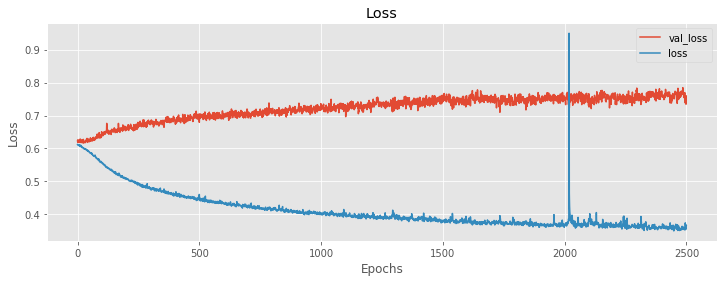

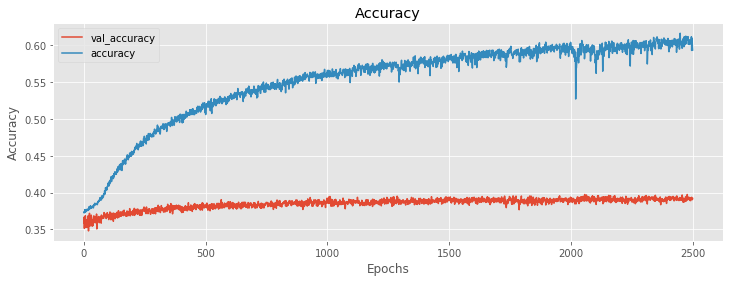

In [113]:
visualize_training_results(res)

The loss and accuracy may show signs of overfitting but the validation accuracy appears to have reached its limit. More epochs or more layers/nodes will most likely not solve the issue. 

A Neural Network most likely will not beat the results from other classification models such as XGBoost.